# Solar radiation nowcasting using Markov Chain

**Xinyuan Hou**, 17.09.2021

Supervisor: **Dr. Stelios Kazadzis**

## Objective

- Provide info about solar radiation availability in the next hour(s) to 
- aid solar power corporations to schedule input distributions

## Data

- Modeling data from Copernicus Atmosphere Monitoring Service
- Cloud Modification Factor

$$CMF = \frac{GHI}{GHI_{CS}}$$
- Global Horizontal Irradiation (all-sky & Clear-Sky)
- CMF
    - -> 0: highly cloudy
    - = 1: cloudless
- 15min interval, 01.02.2004 to 31.12.2019

City           | Coordinates
:--------------|:------------------
Athens         | 37.98° N, 23.72° E 
Bucharest      | 44.44° N, 26.08° E 
Berlin         | 52.52° N, 13.37° E
Helsinki       | 60.19° N, 24.93° E 

## Model & methods

### Markov Chain

1. function `classify(arr...)`

    -> `state` ->

2. function `mcFit(state, order...)`

    -> `T` (transition matrix) ->

3. function `mcPredict(T, data_test...)`

    -> weighted mean of `T` -> `pred`

### State classification

Fig. 1 shows the CMF distributions of training and test sets for Berlin. The test set inherits the classification from the training set, thus does not have equal number of data points in every class.

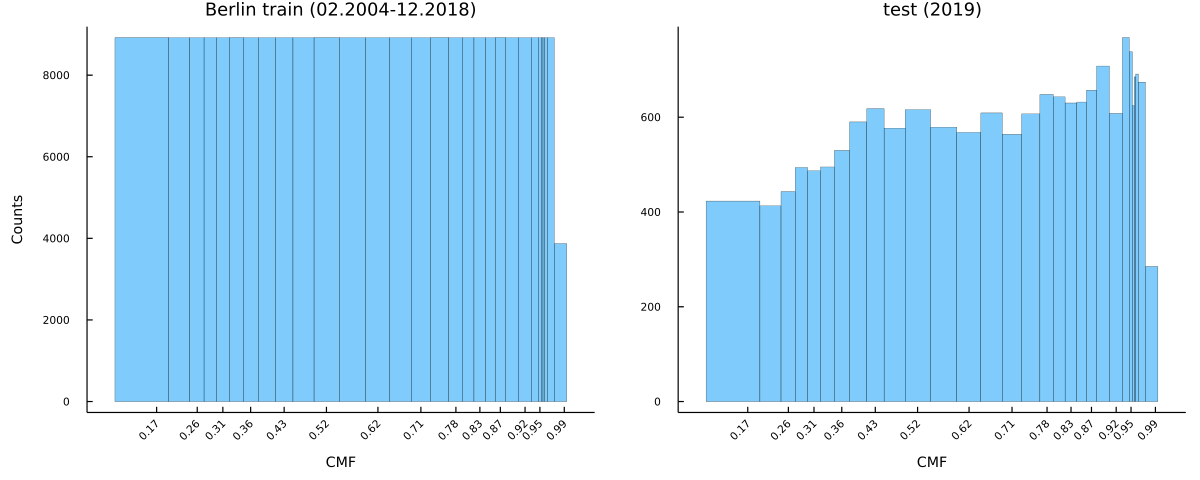

In [23]:
Fig. 1

### Transition matrix

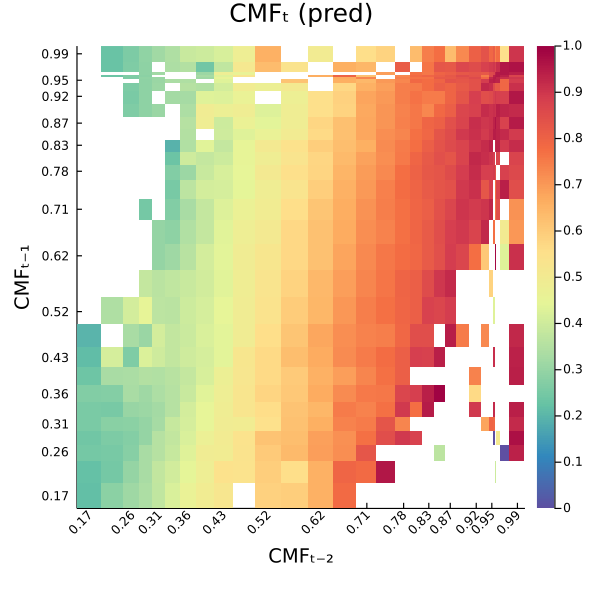

In [38]:
Fig. 2 

### MC Prediction 

We implement two kinds of Markov chain prediction approaches:

- Variant a
    - weighted mean at the specific row (transition) in the transition matrix.
- Variant b
    - predict from previous prediction

In [ ]:
    for i in 1:length(pred) 
        obs1 = data_test[i] # 9:00
        pred1 = predict_od(obs1, od, n, T) # pred 9:15
        pred[i] = pred1
        if steps > 1 # +2
            pred2 = predict_od(pred1, od, n, T) # pred 9:30
            pred[i] = pred2
            if steps > 2 # +3 
                pred3 = predict_od(pred2, od, n, T) # pred 9:45
                pred[i] = pred3
                if steps > 3 # +4 
                    pred4 = predict_od(pred3, od, n, T) # pred 10:00
                    pred[i] = pred4          

### Persistence approach

- uses the CMF value at the previous time step as the prediction for the current time step

### Neighbor inference

- shift to 8 directions by 0.1° lon/lat
- correlation of CMF in central to neighbors at previous time step (-15 min)
- westerly flow => west cell has highest corr. coef.  

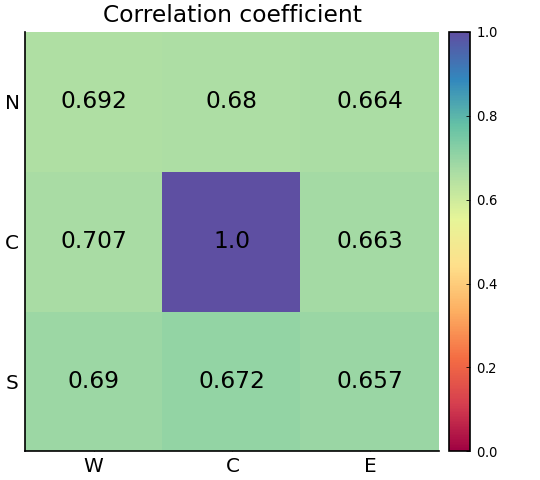

In [43]:
Fig. 3

### Hybrid approach

- divide the time series of 2019 into odd and even time steps
- odd: evaluate the performance of the predictions by MAE & RMSE
- even: apply and compute the metrics for the hybrid approach, along with the previous approaches.

### GHI prediction

$$GHI_{pred} = GHI_{CS} ∙ CMF_{pred}$$

## Results for Berlin

### Mean & standard deviation

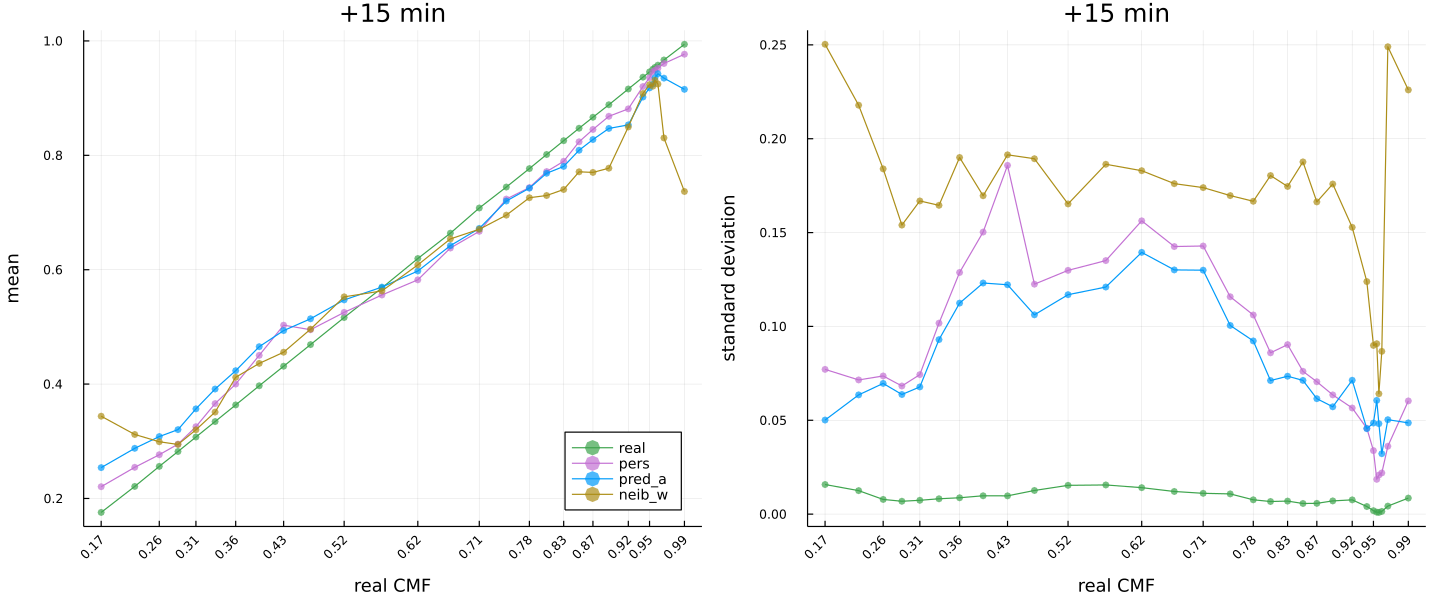

In [38]:
Fig. 4

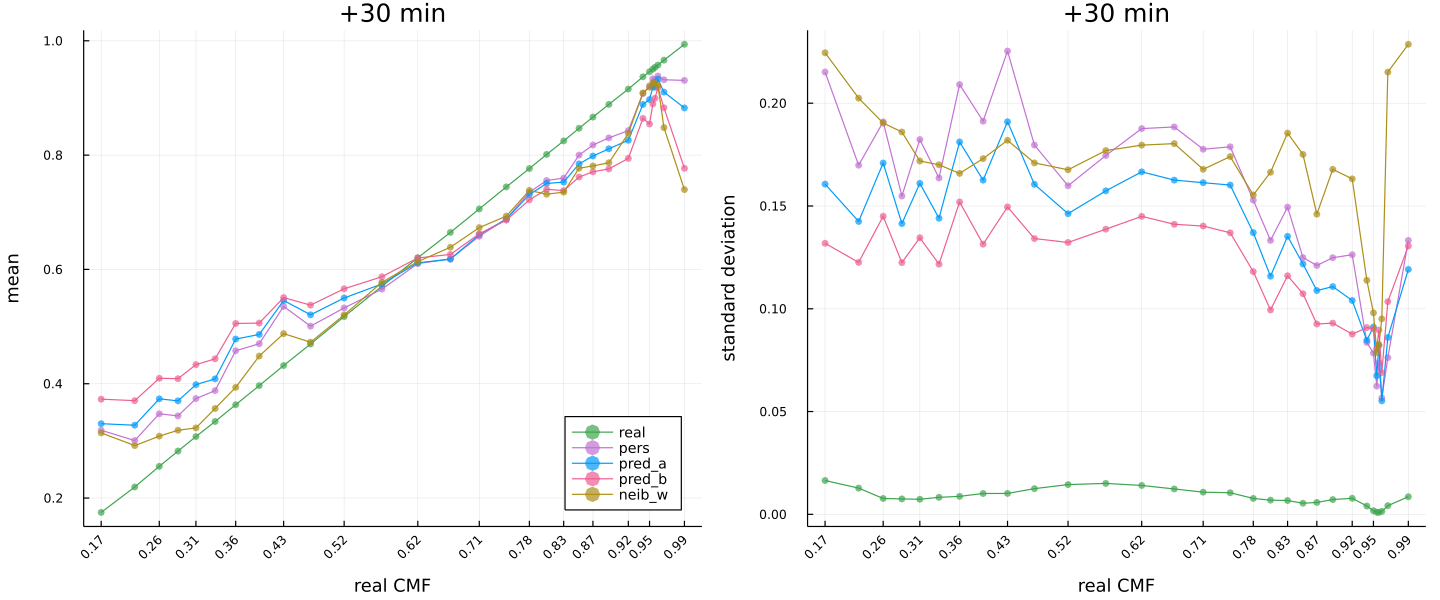

In [37]:
p_mn2 = viz_mn_sd(df22; tit="+30 min")

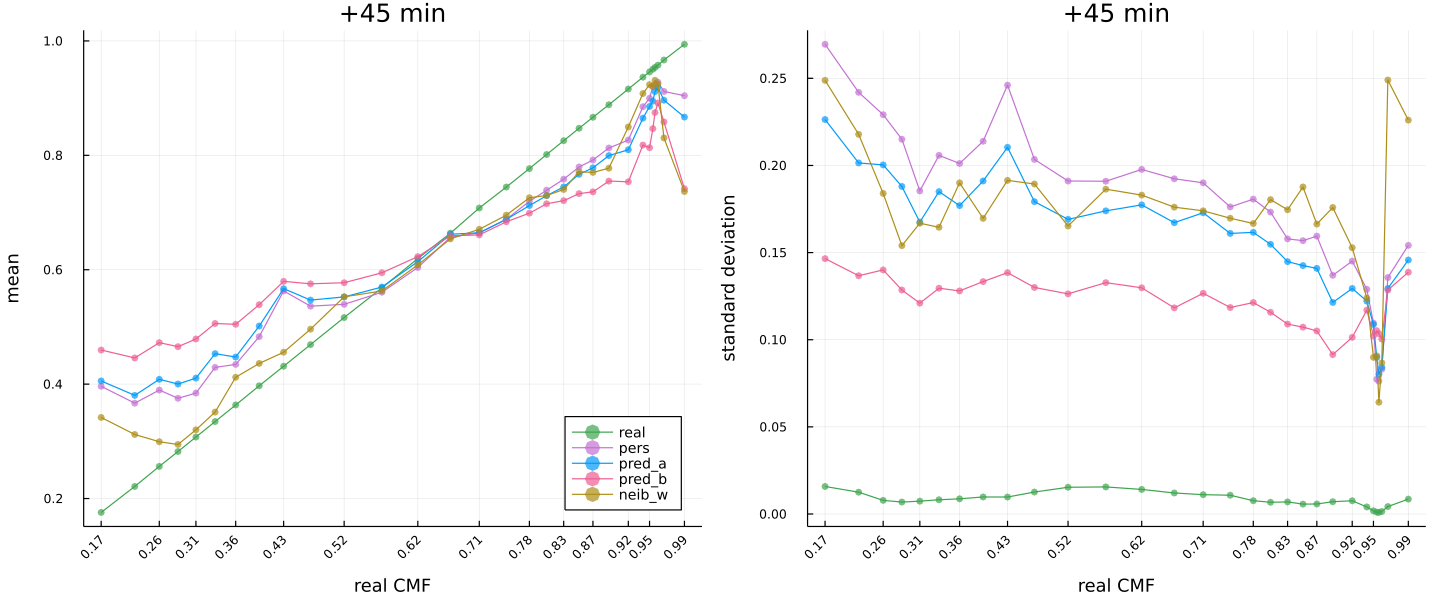

In [39]:
p_mn3 = viz_mn_sd(df23; tit="+$(15*3) min")

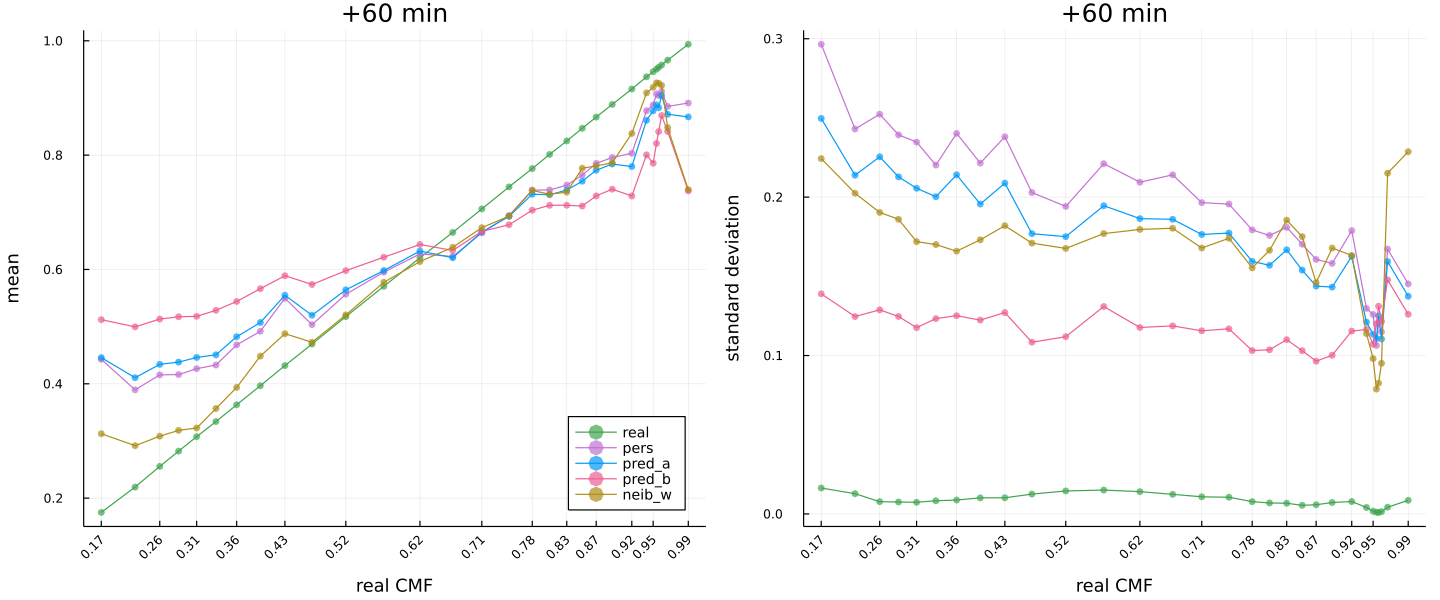

In [40]:
p_mn4 = viz_mn_sd(df24; tit="+$(15*4) min")

### Bias

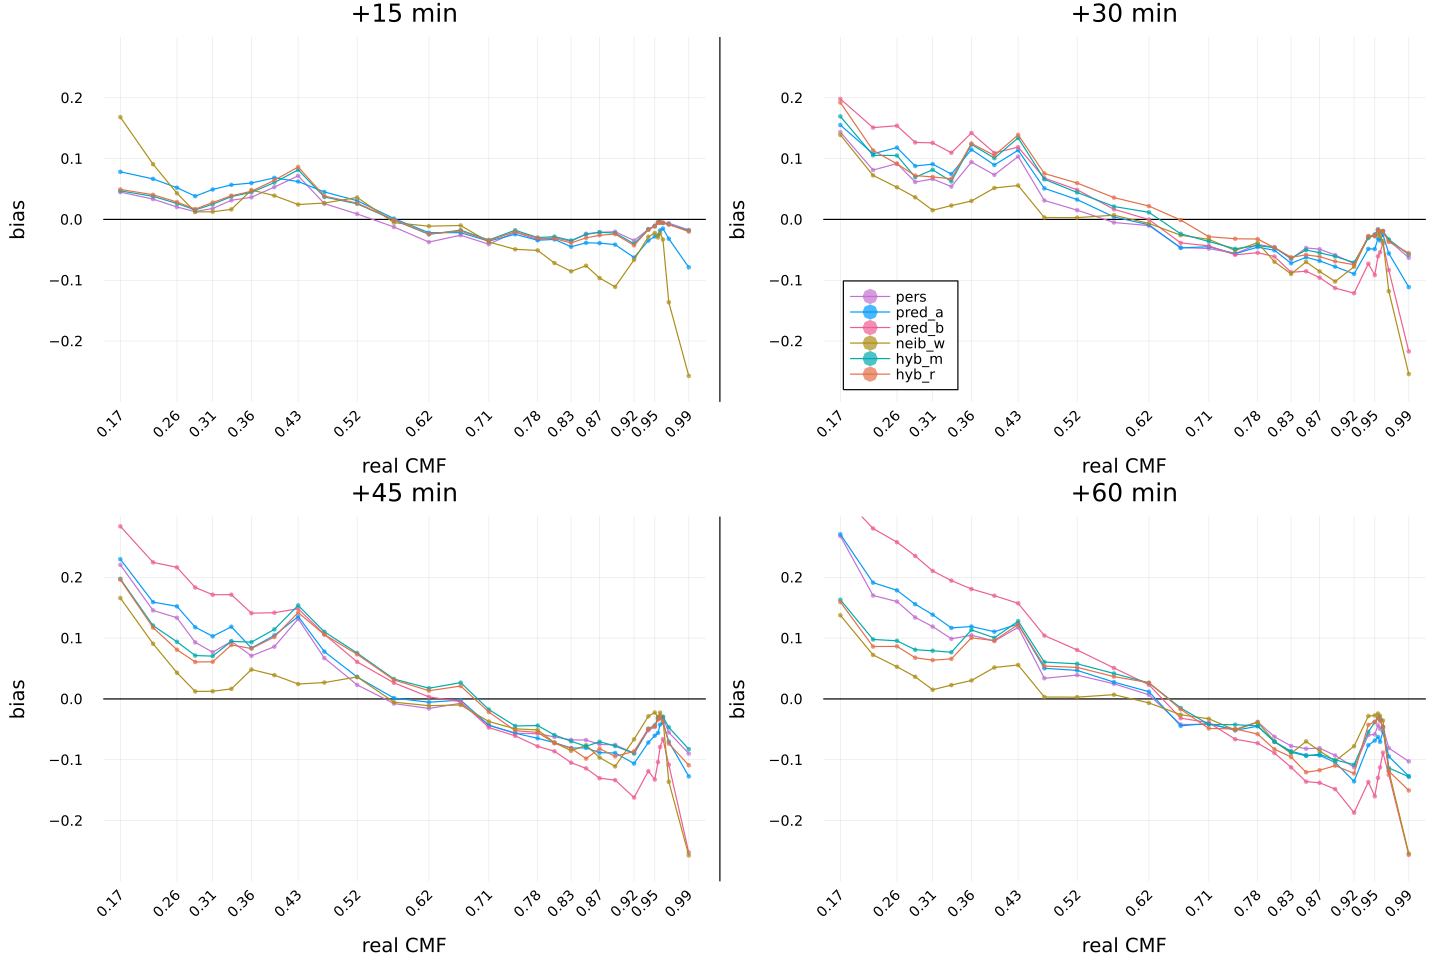

In [97]:
Fig. 5

### First order difference

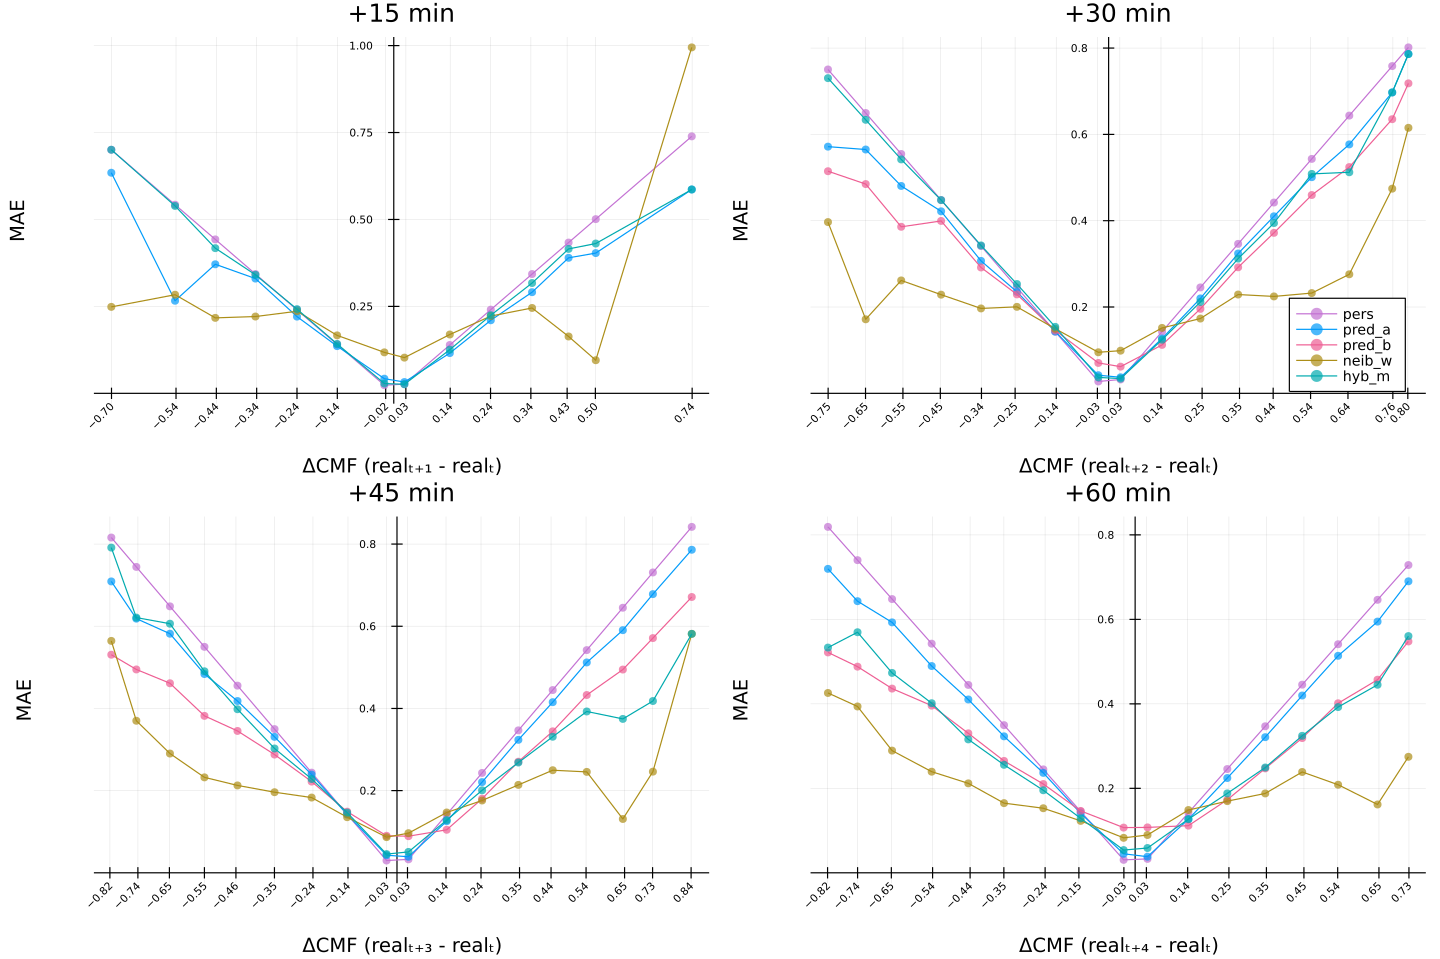

In [91]:
Fig. 6

### MAE versus RMSE

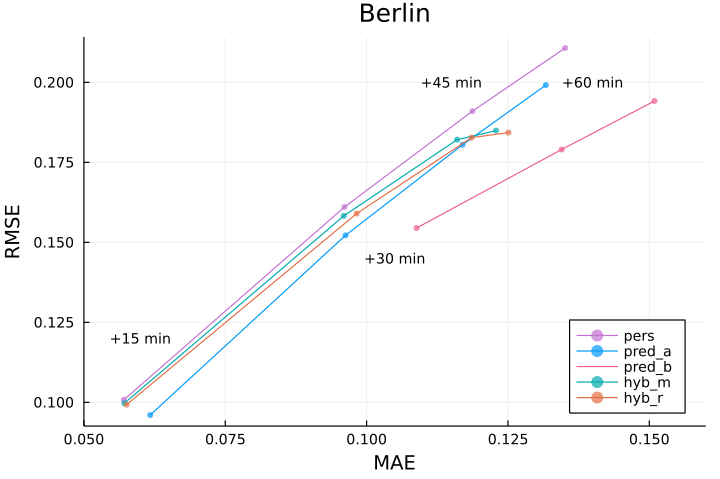

In [28]:
Fig. 7

### GHI evaluation
#### MAE

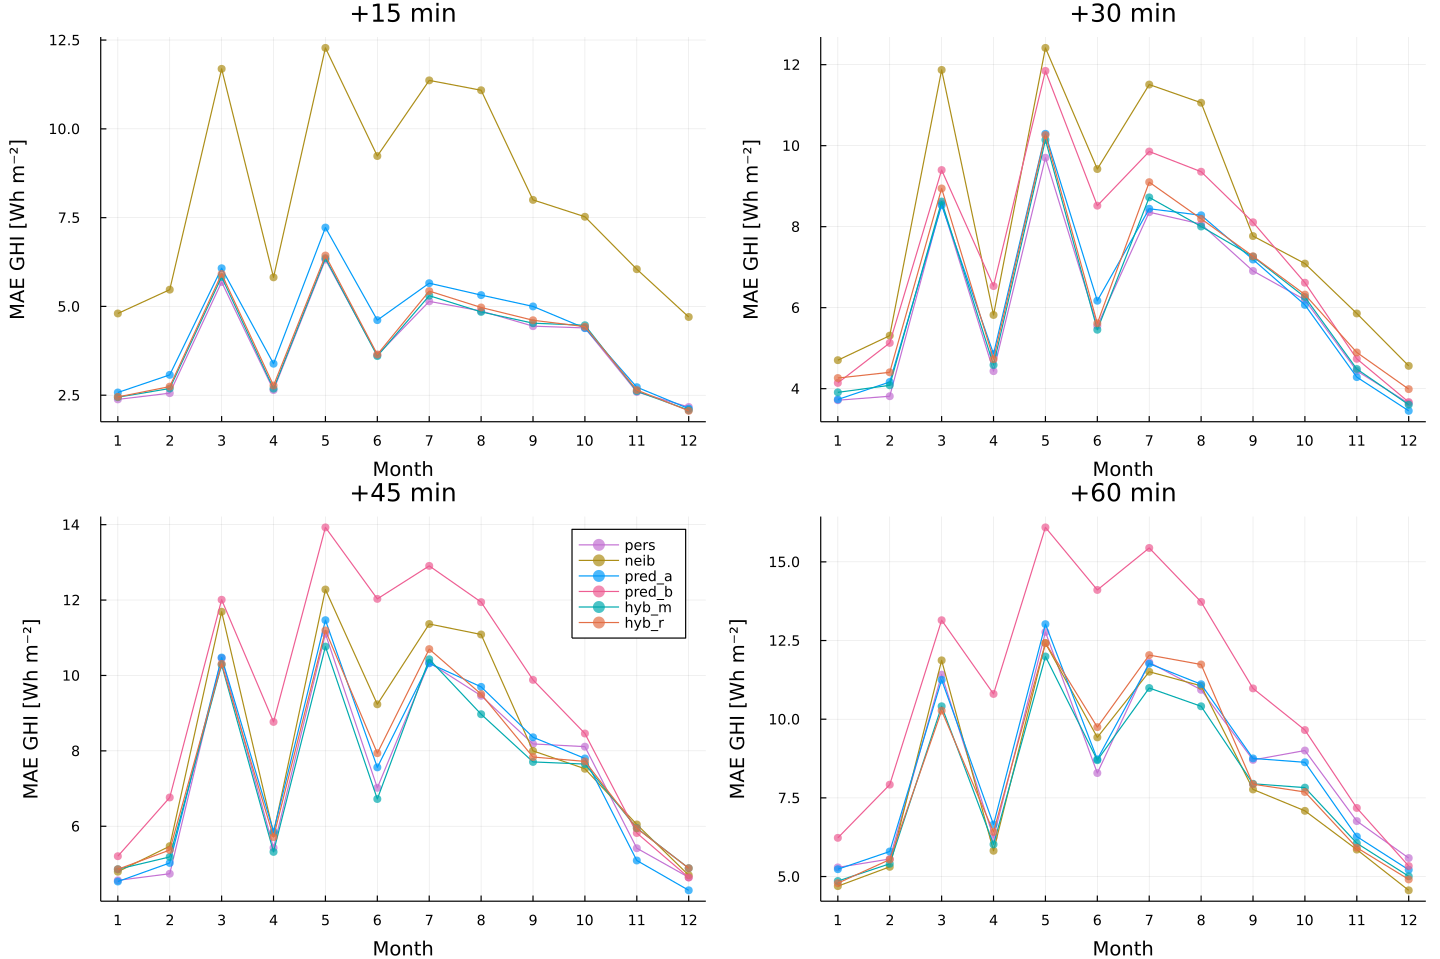

In [46]:
Fig. 8

#### RMSE

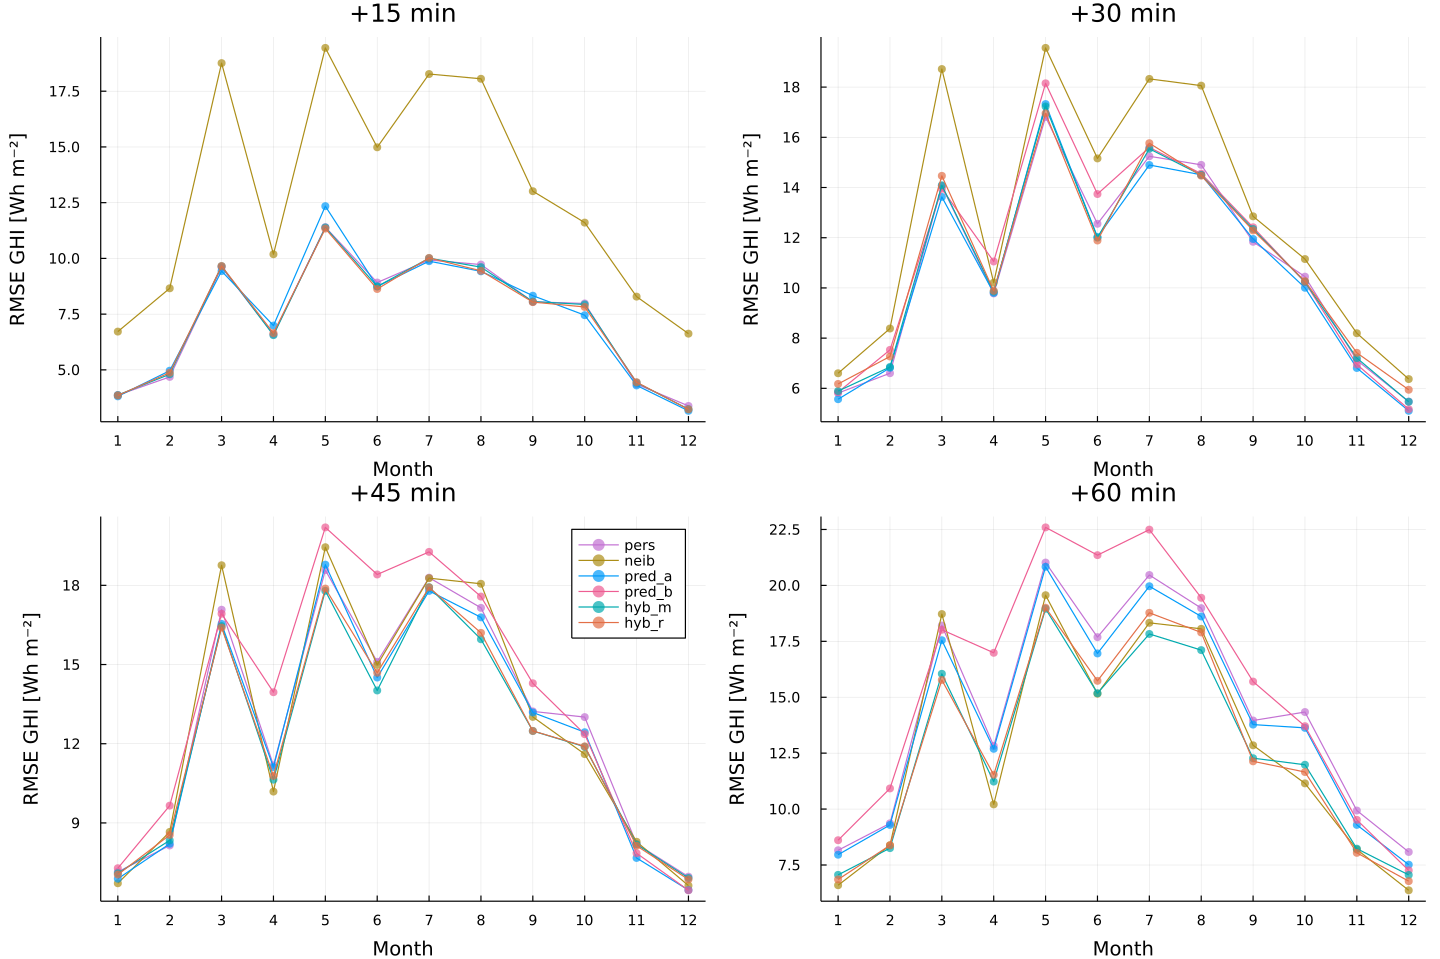

In [50]:
Fig. 9